# Visualizing CARTs with admissions data

Using the admissions data from earlier in the course, build CARTs, look at how they work visually, and compare their performance to more standard, parametric models.


---

### Install and load the packages required to visually show decision tree branching

You will need to first:

1. Install `graphviz` with homebrew (on OSX - not sure what linux uses). The command will be `brew install graphviz`
- Install `pydotplus` with `pip install pydotplus`
- Load the packages as shown below (you may need to restart the kernel after the installations.)

In [8]:
# REQUIREMENTS:
# pip install pydotplus
# brew install graphviz

# Use graphviz to make a chart of the regression tree decision points:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus




---

### Load in admissions data and other python packages

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

plt.style.use('fivethirtyeight')

from ipywidgets import *
from IPython.display import display

%matplotlib inline
%config InlineBackend.figure_format = 'retina'



In [10]:
data = pd.read_csv('/Users/generalassembly/Documents/repo-DC-DSI-3/DC-DSI-3/curriculum/06-week/6.02-intro-to-cart-lab/assets/admissions.csv')

---

### Create regression and classification X, y data

The regression data will be:

    Xr = [admit, gre, prestige]
    yr = gpa
    
The classification data will be:

    Xc = [gre, gpa, prestige]
    yc = admit

In [11]:
data.head()


admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0

## data cleaning

In [12]:
data.isnull().any()


admit       False
gre          True
gpa          True
prestige     True
dtype: bool

In [13]:
data.isnull().sum()


admit       0
gre         2
gpa         2
prestige    1
dtype: int64

In [14]:
data.shape


(400, 4)

In [15]:

# Drop NA and duplicated

data = data.dropna()


In [16]:
data.isnull().sum()


admit       0
gre         0
gpa         0
prestige    0
dtype: int64

## Regression model

In [17]:
feature_cols = ['admit','gre','prestige']
Xr = data[feature_cols]

# store response vector in "y"
yr = data['gpa']



In [18]:
data['gpa'].dtype


dtype('float64')

# I need to fix it

In [19]:
yr = data['gpa'].astype('float')


## linear model

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.grid_search import GridSearchCV

from sklearn import metrics
from sklearn.cross_validation import train_test_split

# STEP 1: split X and y into training and testing sets (using random_state for reproducibility)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(Xr, yr, random_state=99)

import sklearn.linear_model as lm
linreg = lm.LinearRegression()
linreg.fit(X_train_r, y_train_r)
#Y_pred = linreg.predict(Xr)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
linreg.score(Xr,yr)

0.1525825792797969

## classification model

In [22]:
# Set up fake X and Y
Xc = data[['gre', 'gpa', 'prestige']]

Yc = data['admit']


In [23]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression

X_train_c, X_test_c, Y_train_c, Y_test_c = train_test_split(Xc, Yc, test_size=0.33,random_state=99)
X_train_c.size

795

In [24]:
logreg = LogisticRegression()
logreg.fit(X_train_c, Y_train_c)
Y_pred_c = logreg.predict(X_test_c)


In [25]:
from sklearn.metrics import confusion_matrix

confusion = np.array(confusion_matrix(Y_test_c, Y_pred_c))

print(confusion)

[[83  4]
 [37  8]]


In [26]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(Y_test_c, Y_pred_c)
print acc

0.689393939394


---

### Cross-validate regression and logistic regression on the data

Fit a linear regression for the regression problem and a logistic for the classification problem. Cross-validate the R2 and accuracy scores.

---

### Building regression trees

With `DecisionTreeRegressor`:

1. Build 4 models with different parameters for `max_depth`: `max_depth=1`, `max_depth=2`, `max_depth=3`, and `max_depth=None`
2. Cross-validate the R2 scores of each of the models and compare to the linear regression earlier.

In [27]:
import numpy as np
import scipy.stats as stats
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier

from ipywidgets import *
from IPython.display import display

import seaborn as sns
import matplotlib.pyplot as plt


In [28]:
dtree1= DecisionTreeRegressor(max_depth=1)
dtree1.fit(X_train_r, y_train_r)


DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [29]:
dtree2= DecisionTreeRegressor(max_depth=2)
dtree2.fit(X_train_r, y_train_r)


DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [30]:
dtree3= DecisionTreeRegressor(max_depth=3)
dtree3.fit(X_train_r, y_train_r)


DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [31]:
dtree4= DecisionTreeRegressor(max_depth=None)
dtree4.fit(X_train_r, y_train_r)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

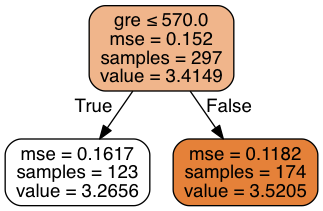

In [32]:
# REQUIREMENTS:
# pip install pydot2
# brew install graphviz

# Use graphviz to make a chart of the regression tree decision points:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()  

export_graphviz(dtree1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names= X_train_r.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

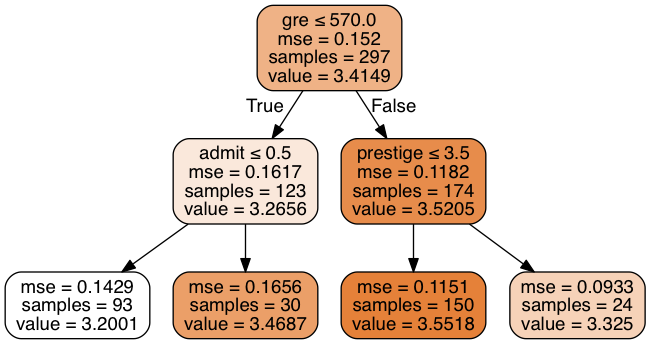

In [33]:
# REQUIREMENTS:
# pip install pydot2
# brew install graphviz

# Use graphviz to make a chart of the regression tree decision points:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()  

export_graphviz(dtree2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names= X_train_r.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

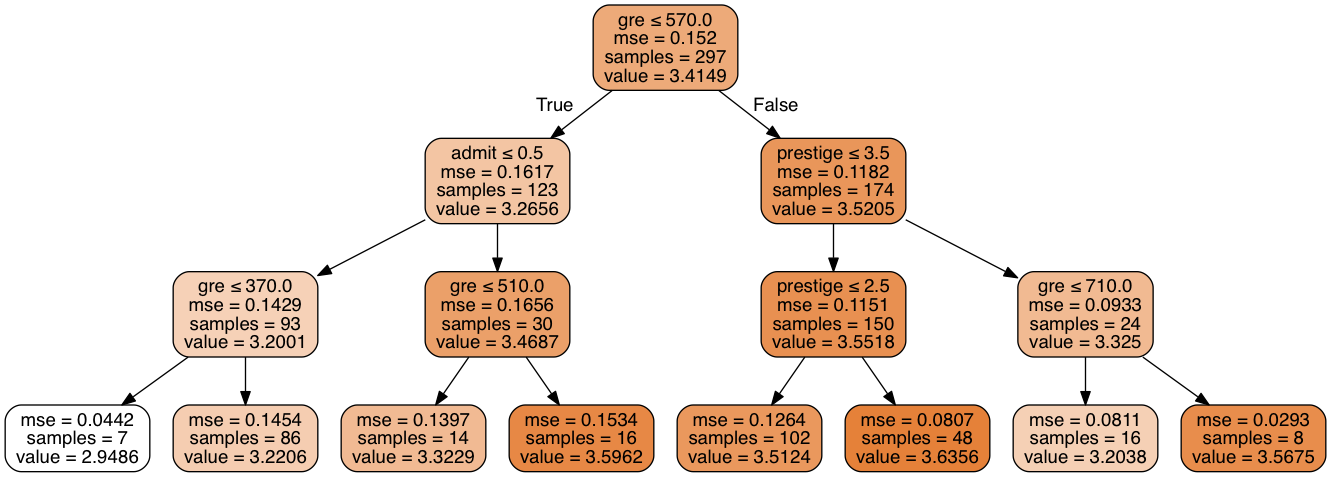

In [34]:
# REQUIREMENTS:
# pip install pydot2
# brew install graphviz

# Use graphviz to make a chart of the regression tree decision points:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()  

export_graphviz(dtree3, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names=X_train_r.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

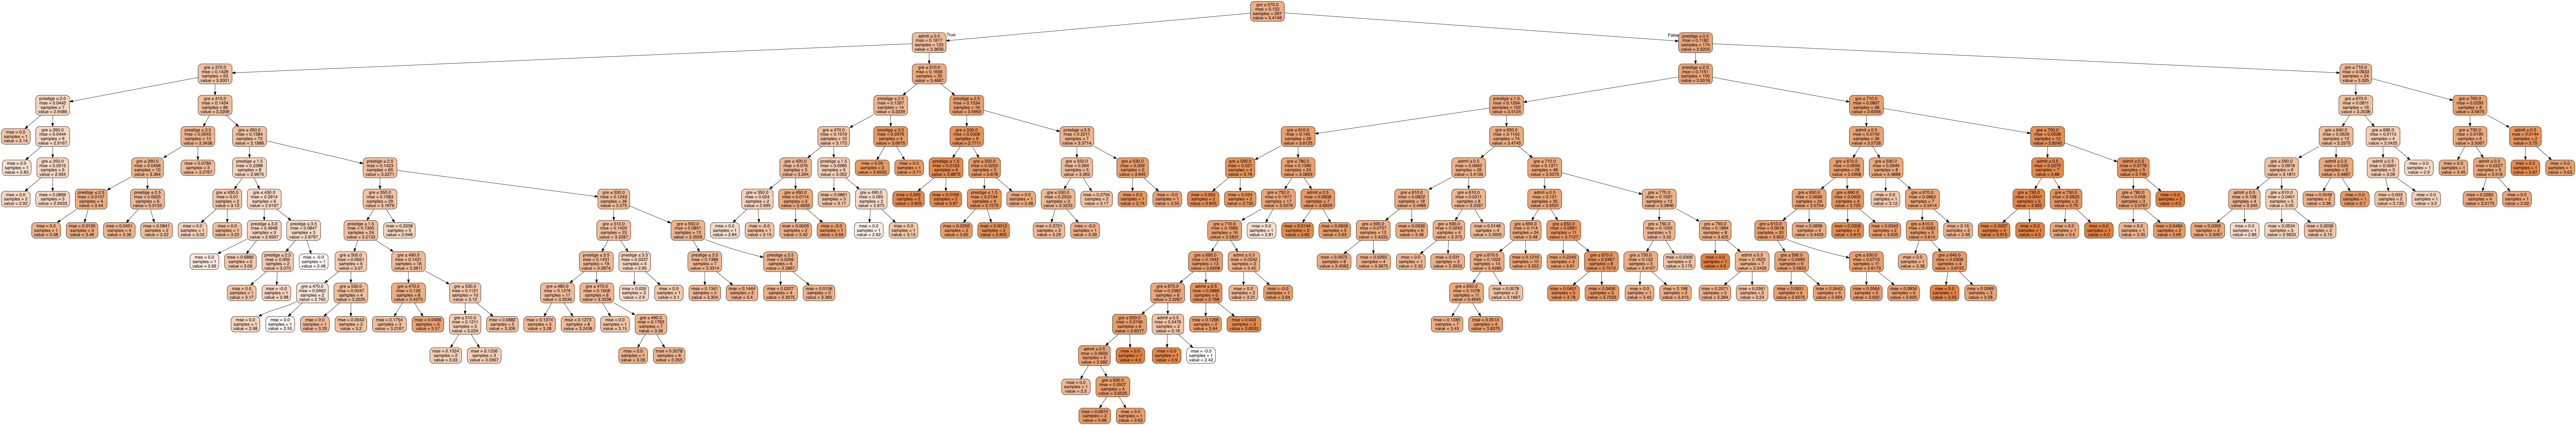

In [35]:
# REQUIREMENTS:
# pip install pydot2
# brew install graphviz

# Use graphviz to make a chart of the regression tree decision points:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()  

export_graphviz(dtree4, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names= X_train_r.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

## Classification

In [45]:
dtree1= DecisionTreeClassifier(max_depth=1)
dtree1.fit(X_train_c, Y_train_c)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [46]:
dtree2= DecisionTreeClassifier(max_depth=2)
dtree2.fit(X_train_c, Y_train_c)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [47]:
dtree3= DecisionTreeClassifier(max_depth=3)
dtree3.fit(X_train_c, Y_train_c)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [48]:
dtree4= DecisionTreeClassifier(max_depth=None)
dtree4.fit(X_train_c, Y_train_c)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

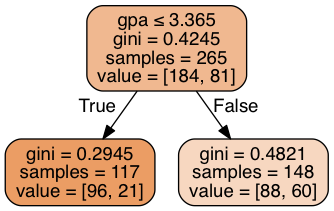

In [49]:
# REQUIREMENTS:
# pip install pydot2
# brew install graphviz

# Use graphviz to make a chart of the regression tree decision points:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()  

export_graphviz(dtree1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names= X_train_c.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

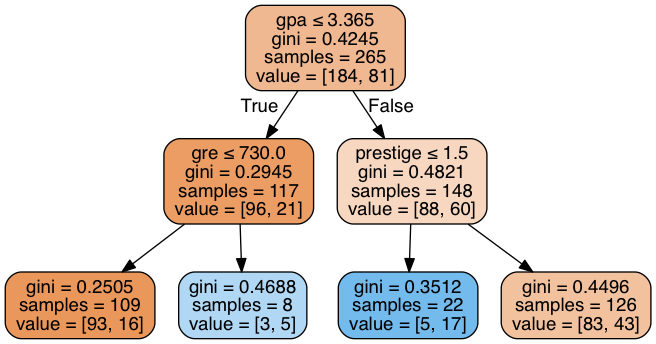

In [50]:
# REQUIREMENTS:
# pip install pydot2
# brew install graphviz

# Use graphviz to make a chart of the regression tree decision points:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()  

export_graphviz(dtree2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names= X_train_c.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

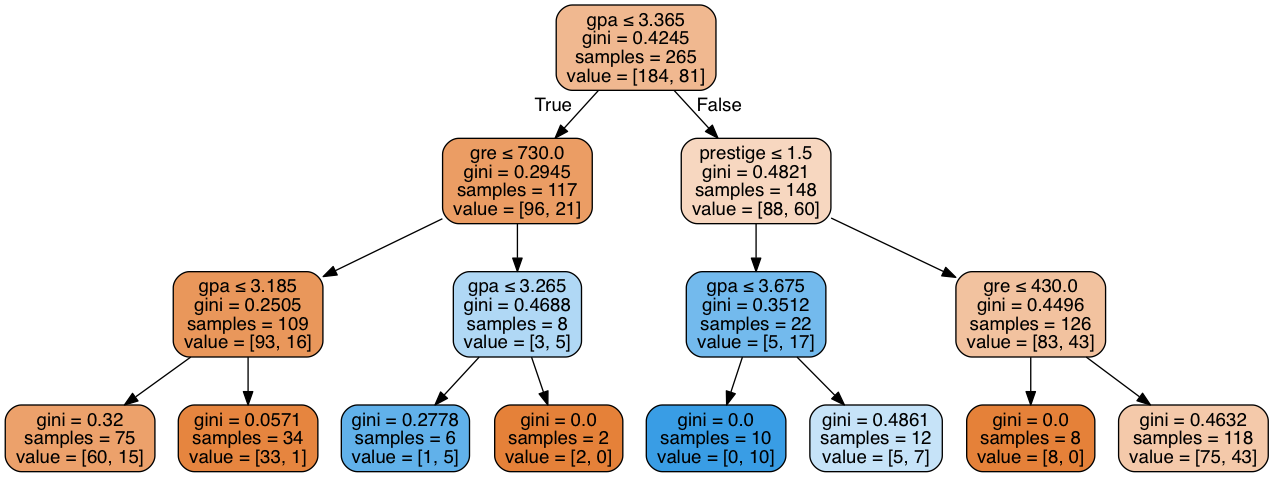

In [51]:
# REQUIREMENTS:
# pip install pydot2
# brew install graphviz

# Use graphviz to make a chart of the regression tree decision points:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()  

export_graphviz(dtree3, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names= X_train_c.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

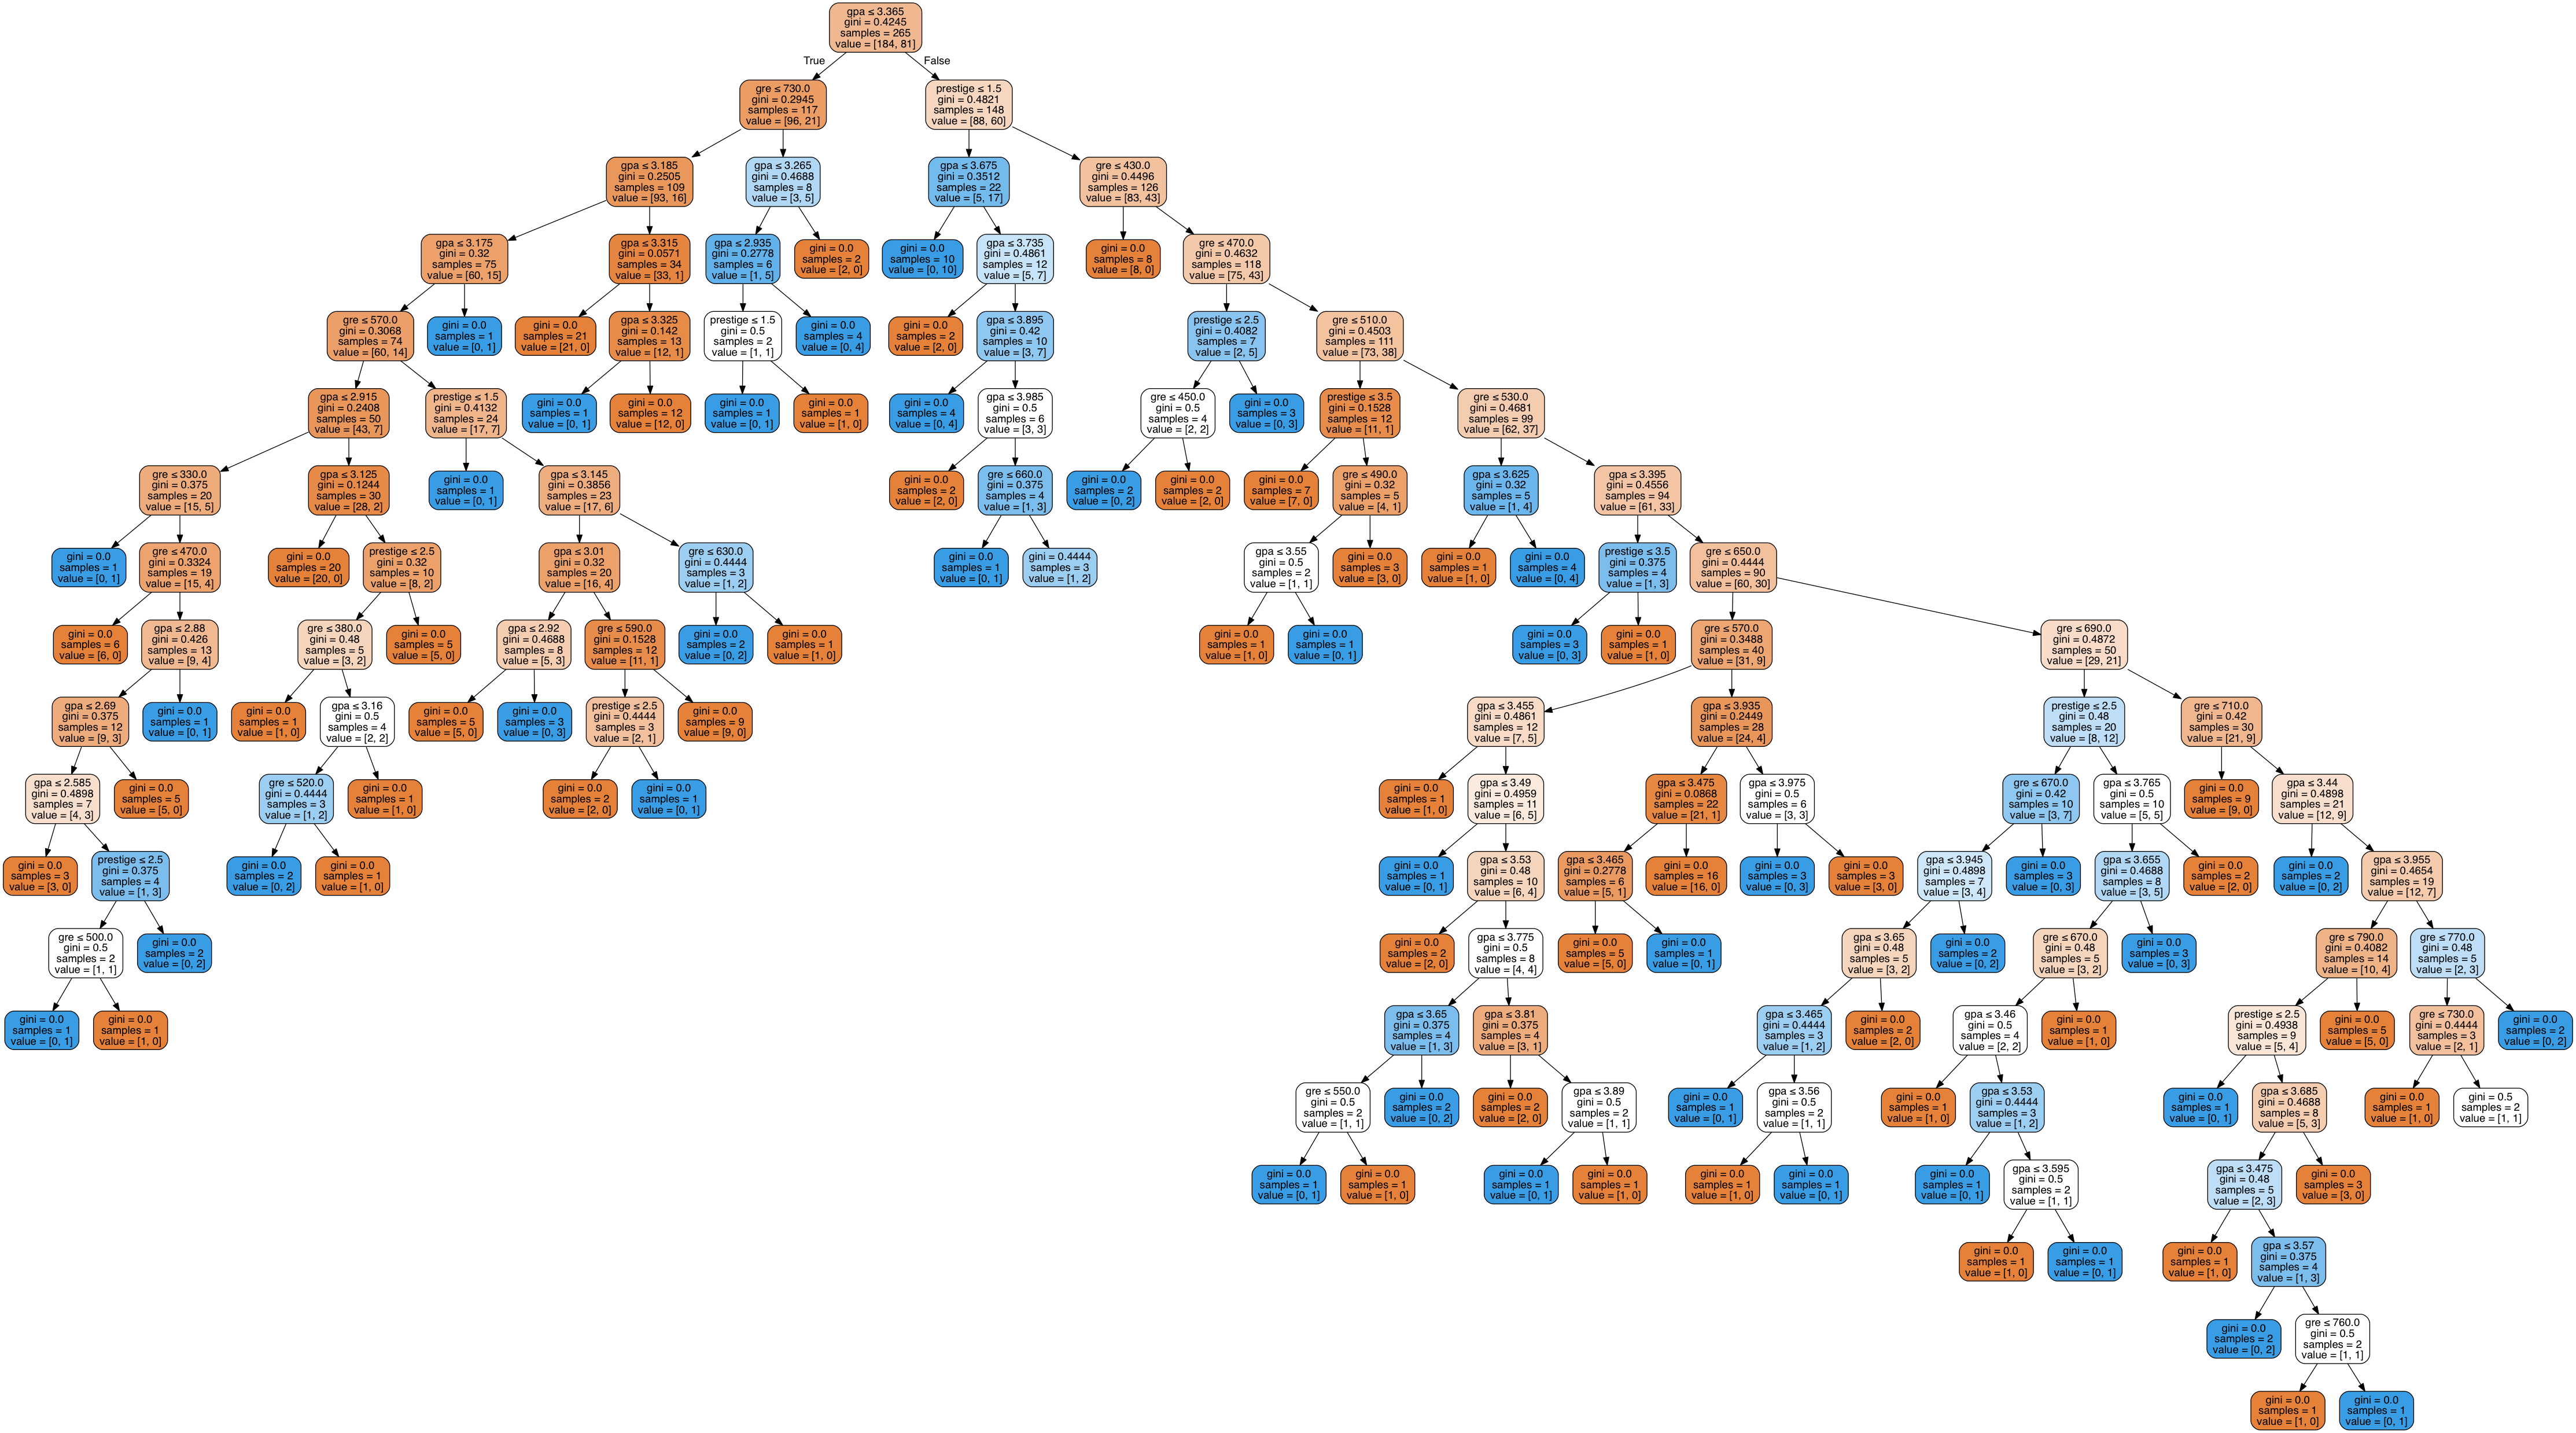

In [52]:
# REQUIREMENTS:
# pip install pydot2
# brew install graphviz

# Use graphviz to make a chart of the regression tree decision points:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()  

export_graphviz(dtree4, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names= X_train_c.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

---

### Visualizing the regression tree decisions

Use the template code below to create charts that show the logic/branching of your four decision tree regressions from above.

#### Interpreting a regression tree diagram

- First line is the condition used to split that node (go left if true, go right if false)
- `samples` is the number of observations in that node before splitting
- `mse` is the mean squared error calculated by comparing the actual response values in that node against the mean response value in that node
- `value` is the mean response value in that node

In [ ]:
# TEMPLATE CODE

# initialize the output file object
dot_data = StringIO() 

# my fit DecisionTreeRegressor object here is: dtr1
# for feature_names i put the columns of my Xr matrix
export_graphviz(dtr1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=Xr.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

---

### Building classification trees

With `DecisionTreeClassifier`:

1. Again build 4 models with different parameters for `max_depth`: `max_depth=1`, `max_depth=2`, `max_depth=3`, and `max_depth=None`
2. Cross-validate the accuracy scores of each of the models and compare to the logistic regression earlier.

Note that now you'll be using the classification task where we are predicting `admit`.

---

### Visualize the classification trees

The plotting code will be the same as for regression, you just need to change the model you're using for each plot and the feature names.

The output changes somewhat from the regression tree chart. Earlier it would give the MSE of that node, but now there is a line called `value` that tells you the count of each class at that node.

---

### Using GridSearchCV to find the best decision tree classifier

Decision tree regression and classification models in sklearn offer a variety of ways to "pre-prune" (by restricting the how many times the tree can branch and what it can use).

Measure           | What it does
------------------|-------------
max_depth         | How many nodes deep can the decision tree go?
max_features      | Is there a cut off to the number of features to use?
max_leaf_nodes    | How many leaves can be generated per node?
min_samples_leaf  | How many samples need to be included at a leaf, at a minimum?  
min_samples_split | How many samples need to be included at a node, at a minimum?

It is not always best to search over _all_ of these in a grid search, unless you have a small dataset. Many of them while not redundant are going to have very similar effects on your model's fit.

Check out the documentation here:

http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

---

#### Switch over to the college stats dataset

We are going to be predicting whether or not a college is public or private. Set up your X, y variables accordingly.

---

### Set up and run the gridsearch on the data

In [54]:
data1 = pd.read_csv('/Users/generalassembly/Documents/repo-DC-DSI-3/DC-DSI-3/curriculum/06-week/6.02-intro-to-cart-lab/assets/College.csv')

In [55]:
data1.isnull().sum()

Unnamed: 0     0
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [58]:
feature_cols = ['Apps','Accept','Enroll','Top10perc','Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate','Room.Board', 'Books','Personal', 'PhD', 'Terminal', 'S.F.Ratio','perc.alumni', 'Expend', 'Grad.Rate']
Xr = data1[feature_cols]

# store response vector in "y"




In [59]:
df_dummies_private  = pd.get_dummies(data1['Private'])
df_dummies_private.columns
df_dummies_private.drop(['No'], axis=1, inplace=True)
data_dummy =data1.join(df_dummies_private)

In [60]:
data_dummy.columns

Index([u'Unnamed: 0', u'Private', u'Apps', u'Accept', u'Enroll', u'Top10perc',
       u'Top25perc', u'F.Undergrad', u'P.Undergrad', u'Outstate',
       u'Room.Board', u'Books', u'Personal', u'PhD', u'Terminal', u'S.F.Ratio',
       u'perc.alumni', u'Expend', u'Grad.Rate', u'Yes'],
      dtype='object')

In [61]:
yr = data_dummy['Yes']

In [ ]:
#yr = data1['Yes']

In [62]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.grid_search import GridSearchCV

from sklearn import metrics
from sklearn.cross_validation import train_test_split

# STEP 1: split X and y into training and testing sets (using random_state for reproducibility)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(Xr, yr, random_state=99)

In [63]:
criteria = ['mse']
max_vals = [1,2,3,4,5,6]
Tree = DecisionTreeClassifier()
max_features = [1,2,3,4,5]


grid = GridSearchCV(estimator=Tree, param_grid=dict(max_depth=max_vals,max_features = max_features), cv=5)

grid.fit(Xr, yr)

# find the best parameters of our gridsearch model.
grid.best_params_
print(grid)
## Summarize the Results of the Grid Search
print(grid.best_score_)
print(grid.best_estimator_.max_depth)


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_features': [1, 2, 3, 4, 5], 'max_depth': [1, 2, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)
0.912483912484
5


---

### Print out the "feature importances"

The model has an attribute called `.feature_importances_` which can tell us which features were most important vs. others. It ranges from 0 to 1, with 1 being the most important.

An easy way to think about the feature importance is how much that particular variable was used to make decisions. Really though, it also takes into account how much that feature contributed to splitting up the class or reducing the variance.

A feature with higher feature importance reduced the criterion (impurity) more than the other features.

Below, show the feature importances for each variable predicting private vs. not, sorted by most important feature to least.

---

### Try using decision tree classification on yelp data from project 5

Does it improve the model?